Installing the modules

In [3]:
pip install xgboost

     -------------------------------------- 150.0/150.0 MB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing the required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Reading the .csv data

In [5]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [9]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Concatinating the dataframes as it is required

In [12]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Checking the dimension of the data

In [13]:
calories_data.shape

(15000, 9)

Inspecting if there is any presence of null values in the columns and know about the data type of each column

In [14]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Looking into the statistical summary of the data

In [16]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Visualization

In [17]:
sns.set() 

<AxesSubplot: xlabel='Gender', ylabel='count'>

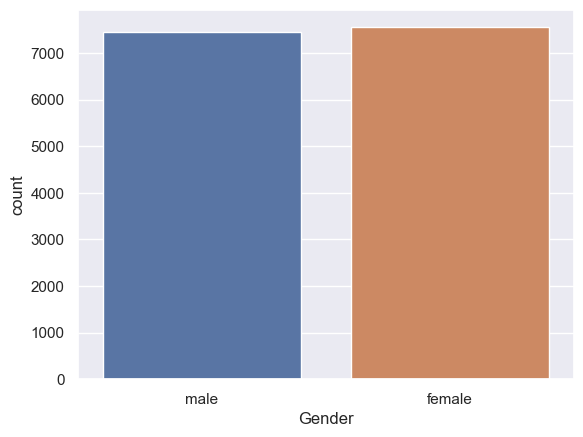

In [21]:
sns.countplot(calories_data, x='Gender') # Visualising the Gender column

C:\Users\HM7\AppData\Local\Temp\ipykernel_20592\1950677799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

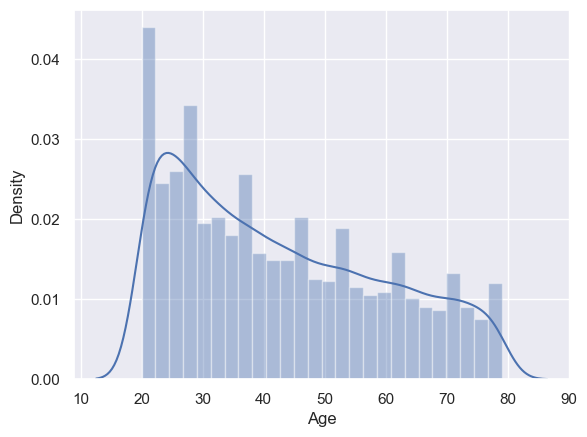

In [26]:
sns.distplot(calories_data['Age']) # distribution plot for the column- Age

C:\Users\HM7\AppData\Local\Temp\ipykernel_20592\2430521470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<AxesSubplot: xlabel='Height', ylabel='Density'>

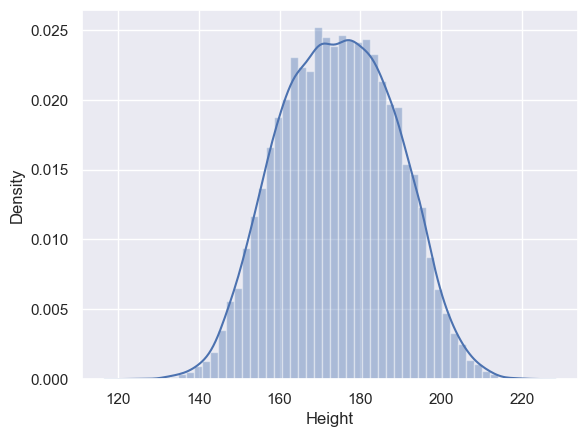

In [27]:
sns.distplot(calories_data['Height'])

C:\Users\HM7\AppData\Local\Temp\ipykernel_20592\1539919118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

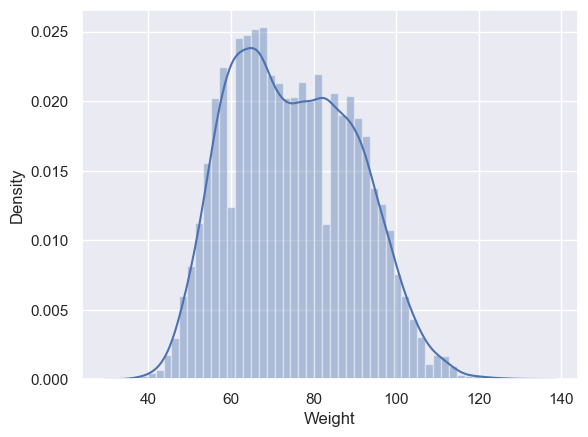

In [28]:
sns.distplot(calories_data['Weight'])

In [29]:
correlation = calories_data.corr() # computing the correlation matrix

C:\Users\HM7\AppData\Local\Temp\ipykernel_20592\669282712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


<AxesSubplot: >

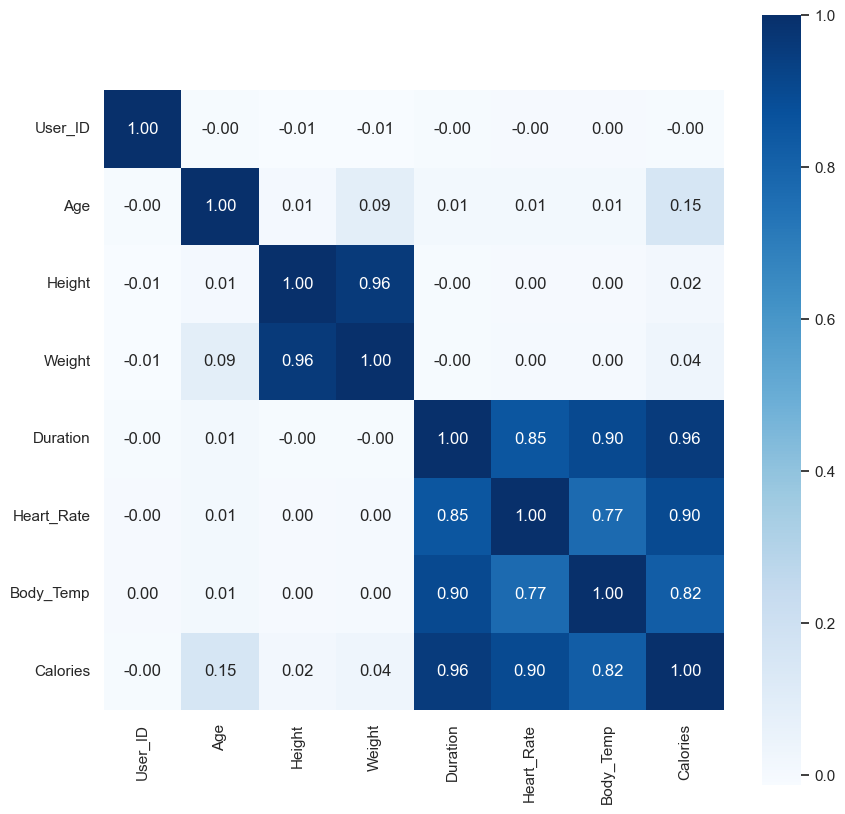

In [31]:
# Plotting the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, cmap='Blues')

In [43]:
#handling the categorical column
gender_encoded = pd.get_dummies(calories_data['Gender'], prefix='Gender')
gender_encoded.head()

,Gender_female,Gender_male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [46]:
# appending the gender encoded columns to the main dataframe
calories_data=pd.concat([calories_data,gender_encoded], axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0


In [47]:
# Separating the features and the target
X = calories_data.drop(columns = ['User_ID','Calories','Gender'], axis=1) #Dropping the unnecessary columns
Y = calories_data['Calories'] # Setting the target column

In [48]:
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,0,1
1,20,166.0,60.0,14.0,94.0,40.3,1,0
2,69,179.0,79.0,5.0,88.0,38.7,0,1
3,34,179.0,71.0,13.0,100.0,40.5,1,0
4,27,154.0,58.0,10.0,81.0,39.8,1,0


In [51]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [53]:
# Splitting the updated data in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 7)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 8) (12000, 8) (3000, 8)


In [55]:
# Building the XGBRegressor model
model = XGBRegressor()

In [57]:
#Training the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [58]:
#Predicting for the test data using the trainrd model
test_data_prediction = model.predict(X_test)

In [59]:
test_data_prediction

array([163.0373  ,  51.399014, 276.05685 , ...,  31.108099,  15.610398,
       146.93646 ], dtype=float32)

In [60]:
#Computing the error metric to see how good is our model
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [61]:
print(f"Mean absolute error: {mae}")

Mean absolute error: 1.4899562304417293


#### MAE is fairly low, so our model is predicting the appropriate values.
#### We can say that we have crreated the good ML model to 'predict the calories burnt'